In [1]:
# load libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.interpolate import griddata


In [3]:
# load the data

fileAT35 = 'AT35comb_complex.mat'
fileDT115 = 'DT115comb_complex.mat'

mat_data1 = sio.loadmat(fileAT35)

# List all the variables and data in the .mat file
for key in mat_data1:
    if not key.startswith('__') and not key.endswith('__'):
        print(f"Variable name: {key}")

gpsref_upz_AT35 = mat_data1['gpsref_upz']
gpsref_nory_AT35 = mat_data1['gpsref_nory']
gpsref_easx_AT35 = mat_data1['gpsref_easx']
gpsref_lat_AT35 = mat_data1['gpsref_lat']
gpsref_lon_AT35 = mat_data1['gpsref_lon']

gpsref_losAT35 = mat_data1['gpsref_los']
AT35comb_lat1D = mat_data1['AT35comb_lat1D']
AT35comb_lon1D = mat_data1['AT35comb_lon1D']
AT35comb_lat2D = mat_data1['AT35comb_lat2D']
AT35comb_lon2D = mat_data1['AT35comb_lon2D']

AT35comb_azimangle = mat_data1['AT35comb_azimangle']
AT35comb_incangle = mat_data1['AT35comb_incangle']
AT35comb_velocity = mat_data1['AT35comb_velocity']

mat_data2 = sio.loadmat(fileDT115)

print(f"\n")
# List all the variables and data in the .mat file
for key in mat_data2:
    if not key.startswith('__') and not key.endswith('__'):
        print(f"Variable name: {key}")

gpsref_upz_DT115 = mat_data2['gpsref_upz']
gpsref_nory_DT115 = mat_data2['gpsref_nory']
gpsref_easx_DT115 = mat_data2['gpsref_easx']
gpsref_lat_DT115 = mat_data2['gpsref_lat']
gpsref_lon_DT115 = mat_data2['gpsref_lon']

gpsref_losDT115 = mat_data2['gpsref_los']
DT115comb_lat1D = mat_data2['DT115comb_lat1D']
DT115comb_lon1D = mat_data2['DT115comb_lon1D']
DT115comb_lat2D = mat_data2['DT115comb_lat2D']
DT115comb_lon2D = mat_data2['DT115comb_lon2D']

DT115comb_azimangle = mat_data2['DT115comb_azimangle']
DT115comb_incangle = mat_data2['DT115comb_incangle']
DT115comb_velocity = mat_data2['DT115comb_velocity']
#DT115comb_velocity = -DT115comb_velocity 

# load the coastline 
mat_contents = sio.loadmat('California.mat')
Xcal = mat_contents['xcal']
Ycal = mat_contents['ycal']

Variable name: AT35comb_dates
Variable name: AT35comb_datesforprint
Variable name: AT35comb_lat1D
Variable name: AT35comb_lon1D
Variable name: AT35comb_lat2D
Variable name: AT35comb_lon2D
Variable name: AT35comb_height
Variable name: AT35comb_azimangle
Variable name: AT35comb_incangle
Variable name: AT35comb_velocity
Variable name: gpsref_lon
Variable name: gpsref_lat
Variable name: gpsref_easx
Variable name: gpsref_nory
Variable name: gpsref_upz
Variable name: gpsref_los
Variable name: AT35comb_tempcoh


Variable name: DT115comb_dates
Variable name: DT115comb_datesforprint
Variable name: DT115comb_lat1D
Variable name: DT115comb_lon1D
Variable name: DT115comb_lat2D
Variable name: DT115comb_lon2D
Variable name: DT115comb_height
Variable name: DT115comb_azimangle
Variable name: DT115comb_incangle
Variable name: DT115comb_velocity
Variable name: gpsref_lon
Variable name: gpsref_lat
Variable name: gpsref_easx
Variable name: gpsref_nory
Variable name: gpsref_upz
Variable name: gpsref_los
Va

In [4]:
gridAT35_gpsref = griddata((gpsref_lon_AT35.flatten(), gpsref_lat_AT35.flatten()), gpsref_losAT35.flatten(), 
                           (AT35comb_lon2D, AT35comb_lat2D), method='cubic')

for i in range(gridAT35_gpsref.shape[0]):
    for j in range(gridAT35_gpsref.shape[1]):
        if np.isnan(AT35comb_velocity[i,j]) == True:
            gridAT35_gpsref[i,j] = np.nan

gridDT115_gpsref = griddata((gpsref_lon_DT115.flatten(), gpsref_lat_DT115.flatten()), gpsref_losDT115.flatten(), 
                            (DT115comb_lon2D, DT115comb_lat2D), method='cubic')

for i in range(gridDT115_gpsref.shape[0]):
    for j in range(gridDT115_gpsref.shape[1]):
        if np.isnan(DT115comb_velocity[i,j]) == True:
            gridDT115_gpsref[i,j] = np.nan
            
xmin_AT35 = AT35comb_lon2D.min()
xmax_AT35 = AT35comb_lon2D.max()
ymin_AT35 = AT35comb_lat2D.min()
ymax_AT35 = AT35comb_lat2D.max()

xmin_DT115 = DT115comb_lon2D.min()
xmax_DT115 = DT115comb_lon2D.max()
ymin_DT115 = DT115comb_lat2D.min()
ymax_DT115 =  DT115comb_lat2D.max()

xmin_comb = min(xmin_AT35, xmin_DT115)
xmax_comb = max(xmax_AT35, xmax_DT115)
ymin_comb = min(ymin_AT35, ymin_AT35)
ymax_comb = max(ymax_AT35, ymax_DT115)

In [5]:
# combine the GPS referenced for AT and DT

indref_AT35 = np.where(gpsref_losAT35 == 0)[1][0]
print(gpsref_lon_AT35.flatten()[indref_AT35])
print(gpsref_lat_AT35.flatten()[indref_AT35])

indref_DT115 = np.where(gpsref_losDT115 == 0)[1][0]
print(gpsref_lon_DT115.flatten()[indref_DT115])
print(gpsref_lat_DT115.flatten()[indref_DT115])

#### confirms that the reference gps is the same 

# get the combined GPS data
unique_elements, unique_indices = np.unique(gpsref_lat_DT115, return_index=True)
unique_indices = unique_indices[np.isin(unique_elements, gpsref_lat_AT35, invert=True)]

unique_gpsref_lon_DT115 = gpsref_lon_DT115.flatten()[unique_indices]
unique_gpsref_lat_DT115 = gpsref_lat_DT115.flatten()[unique_indices]
unique_gpsref_upz_DT115 = gpsref_upz_DT115.flatten()[unique_indices]
unique_gpsref_nory_DT115 = gpsref_nory_DT115.flatten()[unique_indices]
unique_gpsref_easx_DT115 = gpsref_easx_DT115.flatten()[unique_indices]

comb_gpsref_lon = np.append(gpsref_lon_AT35.flatten(),unique_gpsref_lon_DT115)
comb_gpsref_lat = np.append(gpsref_lat_AT35.flatten(),unique_gpsref_lat_DT115)
comb_gpsref_upz = np.append(gpsref_upz_AT35.flatten(),unique_gpsref_upz_DT115)
comb_gpsref_nory = np.append(gpsref_nory_AT35.flatten(),unique_gpsref_nory_DT115)
comb_gpsref_easx = np.append(gpsref_easx_AT35.flatten(),unique_gpsref_easx_DT115)

-122.11931222199999
37.7241178502
-122.11931222199999
37.7241178502


In [6]:
# residual GPS and InSAR

print('xmin_comb = ',xmin_comb)
print('xmax_comb = ',xmax_comb)
print('ymin_comb = ',ymin_comb)
print('ymax_comb = ',ymax_comb)


xmin_comb =  -124.41758330168004
xmax_comb =  -120.73253394831625
ymin_comb =  36.68453957392155
ymax_comb =  39.75371678504366


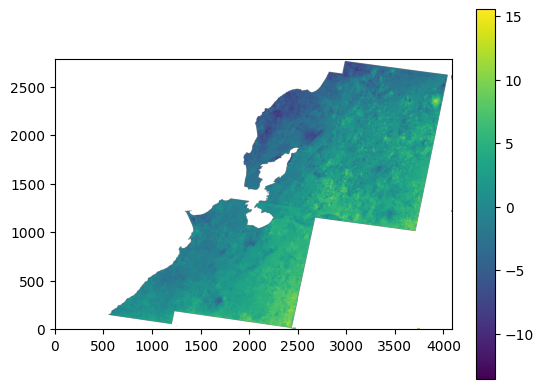

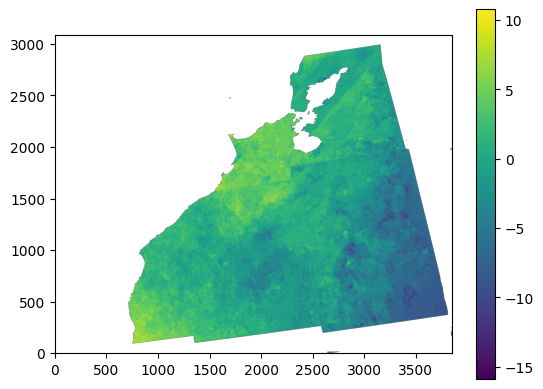

In [7]:
# start plotting

# sp 1 - GPS velocities, sp2 - GPS predicted vel desc, sp3 - GPS pred vel asc 
# sp4 - comb vel desc sp5 - comb vel asc 
# Sp6  - res GPS desc and hist # sp

plt.figure()
plt.imshow(AT35comb_velocity, origin='lower')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(DT115comb_velocity, origin='lower')
plt.colorbar()
plt.show()



In [8]:
# plot the faults 

import csv

def plotfaults():
    '''
    function to call for plotting all the faults for study region 
    '''
    
    with open('clippedqfaults.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            faulttype = row[7]
            if line_count == 0:
                line_count += 1
                continue
            elif line_count < 16047:
            #elif line_count < 160:
                line_count += 1
                try:
                    # for linestring
                    faultloc = row[0]
                    floc1 = faultloc.split("(", 1)
                    floc2 = floc1[1].split(")",1)
                    floc3 = floc2[0].split(",")
                    #print(floc3)
                    floc3 = np.array(floc3)
                    xval = np.zeros((floc3.shape[0]))
                    yval = np.zeros((floc3.shape[0]))
                    for i in range(floc3.shape[0]):
                        xyval = floc3[i]
                        vals = xyval.split(" ")
                        xval[i] = np.float32(vals[0])
                        yval[i] = np.float32(vals[1])
                    if faulttype == 'undifferentiated Quaternary':
                        #fig.plot(x=xval, y=yval, pen="0.5p,gray")
                        ax.plot(xval,yval,linewidth=0.05, color='gray')
                    elif faulttype == 'historic': 
                        #fig.plot(x=xval, y=yval, pen="1.5p,red")
                        ax.plot(xval,yval,linewidth=0.2, color='red')
                    elif faulttype == 'latest Quaternary': 
                        #fig.plot(x=xval, y=yval, pen="1.5p,chocolate4")
                        ax.plot(xval,yval,linewidth=0.2, color='brown')
            
                except: 
                    # for multilinestring
                    faultloc = row[0]
                    floc1 = faultloc.split("(")
                    floc1 = np.array(floc1)
                    for i in range(floc1.shape[0]):
                        if i == 0:
                            continue
                        elif i == 1: 
                            continue
                        else:
                            floc2 = floc1[i]
                            floc3 = floc2.split(")",1)
        
                            floc4 = floc3[0].split(",")
                            floc4 = np.array(floc4)
        
                            xval = np.zeros((floc4.shape[0]))
                            yval = np.zeros((floc4.shape[0]))
                            for j in range(floc4.shape[0]):
                                xyval = floc4[j]
                                vals = xyval.split(" ")
                                xval[j] = np.float32(vals[0])
                                yval[j] = np.float32(vals[1])

                            if faulttype == 'undifferentiated Quaternary':
                                #fig.plot(x=xval, y=yval, pen="0.5p,gray")
                                ax.plot(xval,yval,linewidth=0.05, color='gray')
                            elif faulttype == 'historic': 
                                #fig.plot(x=xval, y=yval, pen="1.5p,red")
                                ax.plot(xval,yval,linewidth=0.05, color='red')
                            elif faulttype == 'latest Quaternary': 
                                #fig.plot(x=xval, y=yval, pen="1.5p,chocolate4")
                                ax.plot(xval,yval,linewidth=0.05, color='brown')
                            
            else:
                break
            
    

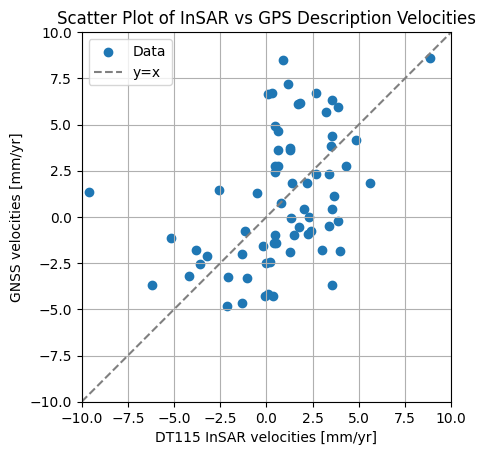

In [9]:
### get the los comparison between GNSS and InSAR at GNSS station

# all gnss stations - comb_gpsref_lon,comb_gpsref_lat
# DT115comb_velocity*1e3 - insar 
# gridDT115_gpsref*1e3 - gnss 

# first for descending track 
# get the gnss stations in the region

ind_stations_desc = []
for i in range(comb_gpsref_lon.shape[0]):
    diff_ind = np.abs(DT115comb_lon1D - comb_gpsref_lon[i])
    ind_insar_lon = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    diff_ind = np.abs(DT115comb_lat1D - comb_gpsref_lat[i])
    ind_insar_lat = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    if not np.isnan(DT115comb_velocity[ind_insar_lat, ind_insar_lon]):
        ind_stations_desc.append(i)  # Append the index to the list

# now get the insar and GNSS velocity 
insar_desc_vals = np.zeros(len(ind_stations_desc))
gps_desc_vals = np.zeros(len(ind_stations_desc))

for i in range(np.array(ind_stations_desc).shape[0]):
    diff_ind = np.abs(DT115comb_lon1D - comb_gpsref_lon[ind_stations_desc[i]])
    ind_insar_lon = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    diff_ind = np.abs(DT115comb_lat1D - comb_gpsref_lat[ind_stations_desc[i]])
    ind_insar_lat = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    insar_desc_vals[i] = DT115comb_velocity[ind_insar_lat,ind_insar_lon]
    gps_desc_vals[i] = gridDT115_gpsref[ind_insar_lat,ind_insar_lon]*1e3

plt.scatter(insar_desc_vals, gps_desc_vals, label='Data')
plt.plot([-10, 15], [-10, 15], color='gray', linestyle='--', label='y=x')  # Plot line passing through (0,0) and (1,1)
plt.grid(True)  # Enable grid

plt.xlabel('DT115 InSAR velocities [mm/yr]')
plt.ylabel('GNSS velocities [mm/yr]')
plt.title('Scatter Plot of InSAR vs GPS Description Velocities')
plt.axis('equal')  # Set aspect ratio to equal

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal axis scaling

plt.legend()  # Display legend
#plt.savefig("figsupp1.pdf", format='pdf', dpi=400)

plt.show()
plt.close()


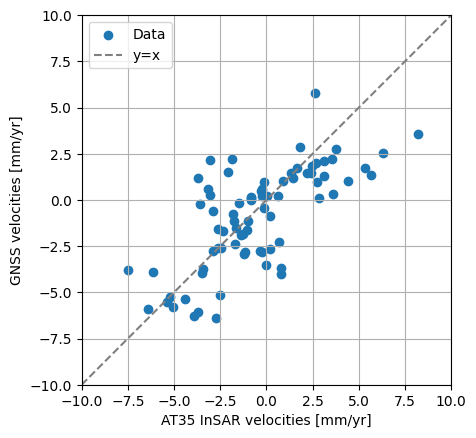

In [10]:
# second for ascending track 
# get the gnss stations in the region

ind_stations_asc = []
for i in range(comb_gpsref_lon.shape[0]):
    diff_ind = np.abs(AT35comb_lon1D - comb_gpsref_lon[i])
    ind_insar_lon = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    diff_ind = np.abs(AT35comb_lat1D - comb_gpsref_lat[i])
    ind_insar_lat = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    if not np.isnan(AT35comb_velocity[ind_insar_lat, ind_insar_lon]):
        ind_stations_asc.append(i)  # Append the index to the list

# now get the insar and GNSS velocity 
insar_asc_vals = np.zeros(len(ind_stations_asc))
gps_asc_vals = np.zeros(len(ind_stations_asc))

for i in range(np.array(ind_stations_asc).shape[0]):
    diff_ind = np.abs(AT35comb_lon1D - comb_gpsref_lon[ind_stations_asc[i]])
    ind_insar_lon = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    diff_ind = np.abs(AT35comb_lat1D - comb_gpsref_lat[ind_stations_asc[i]])
    ind_insar_lat = np.where(diff_ind == np.nanmin(diff_ind))[1][0]

    insar_asc_vals[i] = AT35comb_velocity[ind_insar_lat,ind_insar_lon]
    gps_asc_vals[i] = gridAT35_gpsref[ind_insar_lat,ind_insar_lon]*1e3

plt.scatter(insar_asc_vals, gps_asc_vals, label='Data')
plt.plot([-10, 15], [-10, 15], color='gray', linestyle='--', label='y=x')  # Plot line passing through (0,0) and (1,1)
plt.grid(True)  # Enable grid

plt.xlabel('AT35 InSAR velocities [mm/yr]')
plt.ylabel('GNSS velocities [mm/yr]')
#plt.title('Scatter Plot of InSAR vs GPS Description Velocities')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal axis scaling

plt.legend()  # Display legend
#plt.savefig("figsupp2.pdf", format='pdf', dpi=400)

plt.show()
plt.close()

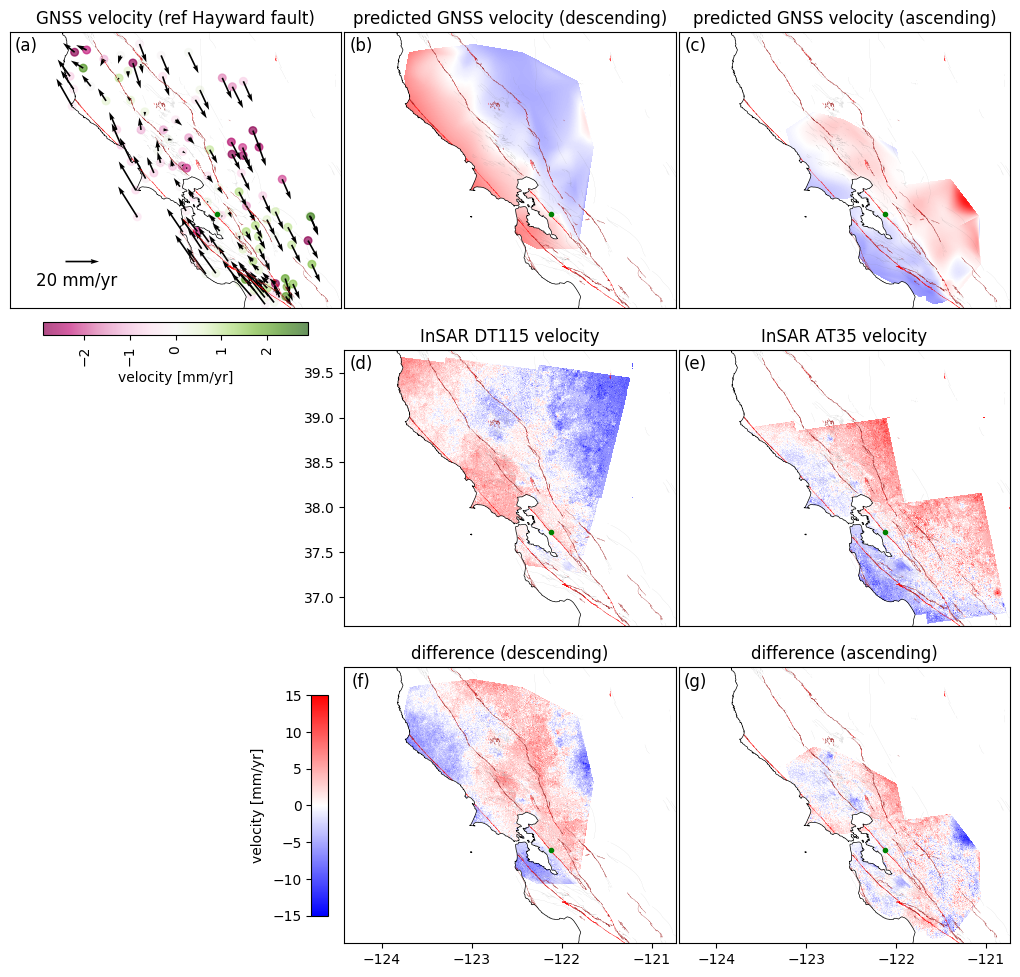

In [11]:
ncols = 3
nrows = 3

# create the plots
fig = plt.figure()
axes = [ fig.add_subplot(nrows, ncols, r * ncols + c+1) for r in range(0, nrows) for c in range(0, ncols) ]

k = 0
# add some data
for ax in axes:
    ival = np.ceil((k+1)/3)-1
    if ((k+1)%3)-1 == -1:
        jval = 2
    else:
        jval = ((k+1)%3)-1
    if k == 0: 
        # plot is GPS referenced plots 
        
        im2 = ax.scatter(comb_gpsref_lon,comb_gpsref_lat, c=comb_gpsref_upz*1e3, cmap='PiYG', s=30, alpha=0.7, vmin = -2.9, vmax = 2.9)
        # Combine coordinates and vector components
        all_lons = np.append(comb_gpsref_lon, -123.8)
        all_lats = np.append(comb_gpsref_lat, 37.2)
        all_easx = np.append(comb_gpsref_easx, .02)
        all_nory = np.append(comb_gpsref_nory, 0)

        # Plot all arrows in a single ax.quiver call
        ax.quiver(all_lons, all_lats, all_easx, all_nory, width=0.005)
        #ax.quiver(comb_gpsref_lon,comb_gpsref_lat,comb_gpsref_easx,comb_gpsref_nory, width=.005)
        
        plotfaults()
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(.2,.1,'20 mm/yr', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        #ax.invert_yaxis()
        ax.title.set_text('GNSS velocity (ref Hayward fault)')
        ax.text(0.05, 0.95, '(a)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        cb2 = fig.colorbar(im2, ax=ax, cax=ax.inset_axes([.1, -0.1, 0.8, 0.05]), orientation='horizontal')
        cb2.set_label('velocity [mm/yr]')
        # Rotate the colorbar tick labels
        for label in cb2.ax.get_xticklabels():
            label.set_rotation(90)
    elif k == 1: 
        ax.imshow(gridDT115_gpsref*1e3, cmap='bwr',  vmin = -15, vmax = 15,
                  extent=[DT115comb_lon1D.min(), DT115comb_lon1D.max(), DT115comb_lat1D.max(), DT115comb_lat1D.min()],
                  interpolation='nearest', origin='lower')

        plotfaults()
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.invert_yaxis()
        ax.title.set_text('predicted GNSS velocity (descending)')
        ax.text(0.05, 0.95, '(b)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
    elif k == 2:
        ax.imshow(gridAT35_gpsref*1e3, cmap='bwr',  vmin = -15, vmax = 15,
                  extent=[AT35comb_lon1D.min(), AT35comb_lon1D.max(), AT35comb_lat1D.max(), AT35comb_lat1D.min()],
                  interpolation='nearest', origin='lower')

        plotfaults()
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.invert_yaxis()
        ax.title.set_text('predicted GNSS velocity (ascending)')
        ax.text(0.05, 0.95, '(c)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
    elif k == 4:
        ax.imshow(DT115comb_velocity, cmap='bwr', vmin = -15, vmax = 15,
                  extent=[DT115comb_lon1D.min(), DT115comb_lon1D.max(), DT115comb_lat1D.max(), DT115comb_lat1D.min()],
                  interpolation='nearest', origin='lower')
        #ax.invert_yaxis()
        ax.title.set_text('InSAR DT115 velocity')
        ax.text(0.05, 0.95, '(d)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        plotfaults()
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_xticks([])
        
        # Create an inset plot in the second subplot
        #alldiff = diffmle_evd.flatten()
        
        #axins = ax.inset_axes([0.1, 0.2, 0.3, 0.3])
        #axins.hist(alldiff, bins=30, alpha=0.5, color='blue')

        # Add a label to the inset plot
        #axins.set_ylabel('freq')

        #axins.set_yticks([])
        #axins.set_xlim(-.005, .005)
        #axins.set_xticklabels(['-.005', '0', '.005'])
        #axins.spines['bottom'].set_linewidth(0.1)
        #axins.spines['left'].set_linewidth(0.1)
        #axins.spines['right'].set_linewidth(0.1)
        #axins.spines['top'].set_linewidth(0.1)

    elif k == 5:
        ax.imshow(AT35comb_velocity, cmap='bwr',  vmin = -15, vmax = 15,
                  extent=[AT35comb_lon1D.min(), AT35comb_lon1D.max(), AT35comb_lat1D.max(), AT35comb_lat1D.min()],
                  interpolation='nearest', origin='lower')
        #ax.invert_yaxis()
        ax.title.set_text('InSAR AT35 velocity')
        ax.text(0.05, 0.95, '(e)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        plotfaults()
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_xticks([])
        ax.set_yticks([])
        # Create an inset plot in the second subplot
        #alldiff = diffmle_stbas.flatten()
        
        #axins = ax.inset_axes([0.1, 0.2, 0.3, 0.3])
        #axins.hist(alldiff, bins=30, alpha=0.5, color='blue')

        # Add a label to the inset plot
        #axins.set_ylabel('freq')

        #axins.set_yticks([])
        #axins.set_xlim(-.01, .01)
        #axins.set_xticklabels(['-.01', '0', '.01'])
        #axins.spines['bottom'].set_linewidth(0.1)
        #axins.spines['left'].set_linewidth(0.1)
        #axins.spines['right'].set_linewidth(0.1)
        #axins.spines['top'].set_linewidth(0.1)
        
    elif k == 7:
        diffDT115 = DT115comb_velocity - gridDT115_gpsref*1e3
        im3 = ax.imshow(diffDT115, cmap='bwr',  vmin = -15, vmax = 15,
                  extent=[DT115comb_lon1D.min(), DT115comb_lon1D.max(), DT115comb_lat1D.max(), DT115comb_lat1D.min()],
                  interpolation='nearest', origin='lower')
        #ax.invert_yaxis()
        ax.title.set_text('difference (descending)')
        ax.text(0.05, 0.95, '(f)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        plotfaults()
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_yticks([])

        cb3 = fig.colorbar(im3, ax=ax, cax=ax.inset_axes([-.1, 0.1, 0.05, 0.8]))
        cb3.ax.yaxis.set_ticks_position('left')
        cb3.set_label('velocity [mm/yr]', labelpad=-55)
    
    elif k == 8:
        diffAT35 = AT35comb_velocity - gridAT35_gpsref*1e3
        ax.imshow(diffAT35, cmap='bwr',  vmin = -15, vmax = 15,
                  extent=[AT35comb_lon1D.min(), AT35comb_lon1D.max(), AT35comb_lat1D.max(), AT35comb_lat1D.min()],
                  interpolation='nearest', origin='lower')
        #ax.invert_yaxis()
        ax.title.set_text('difference (ascending)')
        ax.text(0.05, 0.95, '(g)', fontsize=12, transform=ax.transAxes, ha='center', va='center')
        plotfaults()
        ax.plot(Xcal.flatten(), Ycal.flatten(), 'k-', linewidth=.5)
        ax.plot(gpsref_lon_DT115.flatten()[indref_DT115], gpsref_lat_DT115.flatten()[indref_DT115], 'g.', label='gps reference')
        ax.set_aspect('equal')
        ax.set_xlim(xmin_comb, xmax_comb)
        ax.set_ylim(ymin_comb, ymax_comb)
        ax.set_yticks([])
        
    else:
        ax.axis('off')
    
    k = k+1
    
# remove the x and y ticks
#k = 0
#for ax in axes:
#    if k == 4:
#        ax.set_xticks([])
#    elif k == 7: 
#        ax.set_yticks([])
#    else:
#        
#    k = k+1
    
fig.set_size_inches(10, 9.5)
plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.01, 
                    hspace=0.01)

#plt.savefig("fig2.png", format='png', dpi=400)
plt.show()
plt.close()